In [1]:
pip install umap-learn -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=5de752a8c5e6a74dc07cdd6d3eb2a5af2647fd380b7f2b9cd50ce67cbfca6b9f
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod
Note: you may need to restart the kernel to use updated packages.


In [4]:
# BASIC LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# PREPROCESSING
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import silhouette_score

# DIMENSIONALITY REDUCTION
from umap                    import UMAP

# MODELING
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy           import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

# ANOMALY DETECTION
from sklearn.mixture import GaussianMixture

# 贝叶斯优化
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# ANOMALY DETECTION
from pyod.models.iforest import IForest
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.mixture import GaussianMixture
from pyod.models.auto_encoder import AutoEncoder
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from scipy.stats import norm

import warnings
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from scipy.stats import norm

# 忽略警告
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

2024-07-02 19:15:10.200716: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 19:15:10.200836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 19:15:10.351299: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
train_url = "https://www.dropbox.com/scl/fi/6mmh6yjf7l0n3k9pu0jmx/train_anomalydetection.csv?rlkey=cr68c1hsdf06hspmz9jdi6dm3&st=cbevku5u&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='MembershipID')

target_col = 'Outlier'
X = df_train


In [6]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

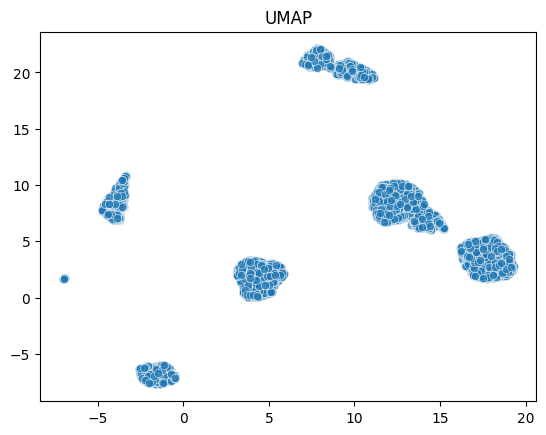

In [7]:
# Reduce Dimension
dim_reducer = UMAP()
X_transformed = dim_reducer.fit_transform(X_processed)

# Visualize
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            alpha=0.7, edgecolor='w', lw=0.5)
plt.title('UMAP')
plt.show()

In [8]:
# MAKE A TRAINING PIPELINE
training_pipeline = Pipeline([
    ('anomaly_detector', IForest())
])



In [9]:
# Define parameter distribution
param_dist = {
    'anomaly_detector__n_estimators': Integer(50, 500),
    'anomaly_detector__max_samples': Real(0.1, 1.0, prior='uniform'),
    'anomaly_detector__contamination': Real(0.01, 0.3, prior='uniform')
}

# 定义评分函数
def anomaly_scorer(estimator, X):
    y_pred = estimator['anomaly_detector'].fit_predict(X)
    return silhouette_score(X, y_pred)

# 执行贝叶斯搜索
bayes_search = BayesSearchCV(
    estimator=training_pipeline,
    search_spaces=param_dist,
    scoring=anomaly_scorer,
    cv=3,
    n_iter=50,
    n_jobs=1,
    verbose=1
)

bayes_search.fit(X_processed)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('anomaly_detector',
                                         IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0))]),
              scoring=<function anomaly_scorer at 0x7c9f1c5bf1c0>,
              search_spaces={'anomaly_detector__contamination': Real(low=0.01, high=0.3, prior='uniform', transform='normalize'),
                             'anomaly_detector__max_samples': Real(low=0.1, high=1.0, prior='uniform', transform='normalize'),
                             'anomaly_detector__n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize')},
              verbose=1)

In [10]:
# Save & fit best model
best_model = bayes_search.best_estimator_
best_model.fit(X_processed)

Pipeline(steps=[('anomaly_detector',
                 IForest(behaviour='old', bootstrap=False, contamination=0.010057070284821432,
    max_features=1.0, max_samples=0.16516387891687653, n_estimators=479,
    n_jobs=1, random_state=None, verbose=0))])

In [11]:
# Get the anomaly scores
anomaly_scores = best_model.predict_proba(X_processed)[:, 1]

# Print the anomaly scores
pd.Series(anomaly_scores)

0       0.302146
1       0.194490
2       0.202576
3       0.795526
4       0.173156
          ...   
6642    0.252289
6643    0.196055
6644    0.832237
6645    0.239844
6646    0.394433
Length: 6647, dtype: float64

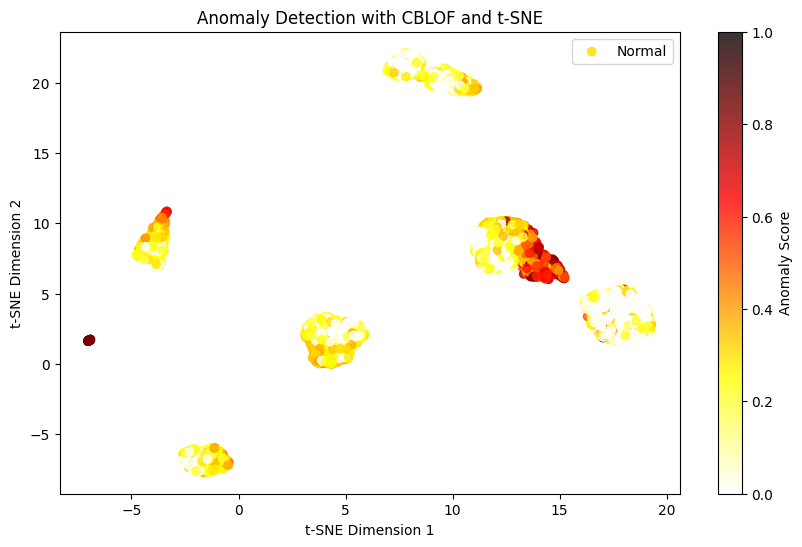

In [12]:
# 将异常得分0.9以上的设置成1，0.25以下的设置成0
anomaly_scores[anomaly_scores > 0.95] = 1
anomaly_scores[anomaly_scores < 0.18] = 0

def draw_data_points(X_transformed, scores):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=scores, cmap='hot_r', alpha=0.8, label='Normal')
    plt.colorbar(label='Anomaly Score')
    plt.title('Anomaly Detection with CBLOF and t-SNE')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend()
    plt.show()

# 绘制数据点
draw_data_points(X_transformed, anomaly_scores)

In [13]:
submission = pd.DataFrame(anomaly_scores, index=X.index, columns=['Outlier'])

# Make a CSV file for Submission
submission.to_csv('submission.csv')

submission

,Outlier
MembershipID,
AK39205,0.302146
CY14365,0.194490
PR52596,0.202576
OK30685,0.795526
JT59321,0.000000
...,...
KF85677,0.252289
WG22942,0.196055
BY75476,0.832237
